In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [39]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [204]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [41]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [42]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [43]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [44]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [45]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [48]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent.date)

2017-08-23


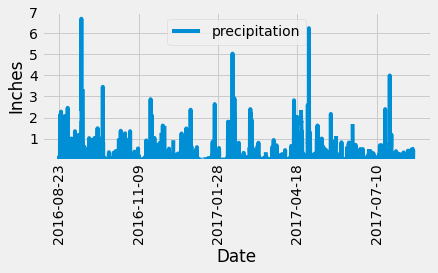

In [254]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date=dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,
      Measurement.prcp]
      
last_year_data= session.query(*sel).\
    filter(func.strftime(Measurement.date)>=query_date).\
    order_by(Measurement.date)

# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df = pd.DataFrame(last_year_data, columns=['date', 'precipitation'])
last_year_df.set_index('date')

#Sort the dataframe by date
sorted_df['date'] = pd.to_datetime(sorted_df['date'])
sorted_df['date'] = sorted_df['date'].map(lambda dt: dt.strftime('%Y-%m-%d'))

#Use Pandas Plotting with Matplotlib to plot the data

#format data and plot
datetime_series = pd.to_datetime(sorted_df['date'])
datetime_index  = pd.DatetimeIndex(datetime_series.values)
sorted_df.set_index(datetime_index, inplace=True)
listOf_Yticks=[1,2,3,4,5,6,7]
sorted_df.plot(x='date', y='precipitation', rot=90, figsize=(6,4))
plt.tight_layout()
plt.ylabel('Inches')
plt.xlabel('Date')
plt.locator_params(axis="x", nbins=9)
plt.ylim([0,7])
plt.yticks(listOf_Yticks)

plt.show()


In [186]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_sum_df = last_year_df.groupby(["date"])[["precipitation"]].agg(["count","mean","median","sum","std","sem"])
last_year_sum_df

#alternative summary statitics for the precipitaion data
last_year_sum_df.describe()

precipitation                                           
                   count      mean median   sum       std       sem
date                                                               
2016-08-23             6  0.451667  0.100  2.71  0.706468  0.288414
2016-08-24             6  1.555000  1.800  9.33  0.840541  0.343150
2016-08-25             7  0.077143  0.080  0.54  0.071813  0.027143
2016-08-26             6  0.016667  0.015  0.10  0.016330  0.006667
2016-08-27             5  0.064000  0.020  0.32  0.081731  0.036551
...                  ...       ...    ...   ...       ...       ...
2017-08-19             3  0.030000  0.000  0.09  0.051962  0.030000
2017-08-20             2  0.005000  0.005  0.01  0.007071  0.005000
2017-08-21             3  0.193333  0.020  0.58  0.317700  0.183424
2017-08-22             3  0.166667  0.000  0.50  0.288675  0.166667
2017-08-23             4  0.132500  0.040  0.53  0.215000  0.107500

[366 rows x 6 columns]

# Exploratory Station Analysis

In [195]:
# Design a query to calculate the total number stations in the dataset
total_count = session.query(Station).distinct().count()
print(total_count)

9


In [249]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station,
     func.count(Measurement.id).label('qty')]

station_freq= session.query(*sel).\
    group_by(Measurement.station).\
    order_by(desc('qty'))
station_freq

# Save the query results as a Pandas DataFrame
station_freq_df = pd.DataFrame(station_freq, columns=['Station', 'Count'])

#store and display most popular station and count of observations
popular_station = station_freq.first()
popular_station

('USC00519281', 2772)

In [243]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.max(Measurement.tobs).label('max'),
      func.min(Measurement.tobs).label('min'),
      func.avg(Measurement.tobs).label('avg')]

popular_data = session.query(*sel).\
   filter(Measurement.station == 'USC00519281')

# Save the query results as a Pandas DataFrame and display results
popular_data_df = pd.DataFrame(popular_data, columns=['max', 'min', 'avg'])
popular_data_df    

,max,min,avg
0,85.0,54.0,71.663781


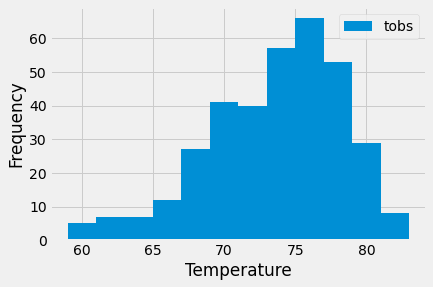

In [294]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

popular_observations = session.query(Measurement.tobs).\
    filter(func.strftime(Measurement.date)>=query_date).\
    filter(Measurement.station == 'USC00519281')    

popular_observations_df = pd.DataFrame(popular_observations, columns=['tobs'])
popular_observations_df.set_index('tobs')

plt.hist(popular_observations_df, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(popular_observations_df)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()